In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

horse_dataset = pd.read_csv("horse-colic.data", sep='\s+', na_values= "?")

horse_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surg?               299 non-null    float64
 1   Age                 300 non-null    int64  
 2   Hosp_num            300 non-null    int64  
 3   Rect_temp           240 non-null    float64
 4   Pulse               276 non-null    float64
 5   Respir_rate         242 non-null    float64
 6   Temp_of_extrem      244 non-null    float64
 7   Periph_pulse        231 non-null    float64
 8   Mucous_membr        253 non-null    float64
 9   Capill_ref_time     268 non-null    float64
 10  Pain                245 non-null    float64
 11  Peristal            256 non-null    float64
 12  Abdom_dist          244 non-null    float64
 13  Nasogas_tube        196 non-null    float64
 14  Nasogas_reflux      194 non-null    float64
 15  Nasogas_ref_PH      53 non-null     float64
 16  Feces   

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19116\1657405773.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  horse_dataset = pd.read_csv("horse-colic.data", delim_whitespace=True, na_values= "?")


In [3]:
print(horse_dataset)

     Surg?  Age  Hosp_num  Rect_temp  Pulse  Respir_rate  Temp_of_extrem  \
0      2.0    1    530101       38.5   66.0         28.0             3.0   
1      1.0    1    534817       39.2   88.0         20.0             NaN   
2      2.0    1    530334       38.3   40.0         24.0             1.0   
3      1.0    9   5290409       39.1  164.0         84.0             4.0   
4      2.0    1    530255       37.3  104.0         35.0             NaN   
5      2.0    1    528355        NaN    NaN          NaN             2.0   
6      1.0    1    526802       37.9   48.0         16.0             1.0   
7      1.0    1    529607        NaN   60.0          NaN             3.0   
8      2.0    1    530051        NaN   80.0         36.0             3.0   
9      2.0    9   5299629       38.3   90.0          NaN             1.0   
10     1.0    1    528548       38.1   66.0         12.0             3.0   
11     2.0    1    527927       39.1   72.0         52.0             2.0   
12     1.0  

In [4]:
horse_dataset.describe()

Surg?         Age      Hosp_num   Rect_temp       Pulse  \
count  299.000000  300.000000  3.000000e+02  240.000000  276.000000   
mean     1.397993    1.640000  1.085889e+06   38.167917   71.913043   
std      0.490305    2.173972  1.529801e+06    0.732289   28.630557   
min      1.000000    1.000000  5.184760e+05   35.400000   30.000000   
25%      1.000000    1.000000  5.289040e+05   37.800000   48.000000   
50%      1.000000    1.000000  5.303055e+05   38.200000   64.000000   
75%      2.000000    1.000000  5.347275e+05   38.500000   88.000000   
max      2.000000    9.000000  5.305629e+06   40.800000  184.000000   

       Respir_rate  Temp_of_extrem  Periph_pulse  Mucous_membr  \
count   242.000000      244.000000    231.000000    253.000000   
mean     30.417355        2.348361      2.017316      2.853755   
std      17.642231        1.045054      1.042428      1.620294   
min       8.000000        1.000000      1.000000      1.000000   
25%      18.500000        1.000000      1.000000      1.000000   
50%      24.500000        3.000000      2.000000      3.000000   
75%      36.000000        3.000000      3.000000      4.000000   
max      96.000000        4.000000      4.000000      6.000000   

       Capill_ref_time       Pain    Peristal  Abdom_dist  Nasogas_tube  \
count       268.000000  245.00000  256.000000  244.000000    196.000000   
mean          1.305970    2.95102    2.917969    2.266393      1.755102   
std           0.477629    1.30794    0.976744    1.065131      0.649437   
min           1.000000    1.00000    1.000000    1.000000      1.000000   
25%           1.000000    2.00000    3.000000    1.000000      1.000000   
50%           1.000000    3.00000    3.000000    2.000000      2.000000   
75%           2.000000    4.00000    4.000000    3.000000      2.000000   
max           3.000000    5.00000    4.000000    4.000000      3.000000   

       Nasogas_reflux  Nasogas_ref_PH       Feces     Abdomen  \
count      194.000000       53.000000  198.000000  182.000000   
mean         1.582474        4.707547    2.757576    3.692308   
std          0.805359        1.982311    1.251119    1.491725   
min          1.000000        1.000000    1.000000    1.000000   
25%          1.000000        3.000000    1.000000    2.000000   
50%          1.000000        5.000000    3.000000    4.000000   
75%          2.000000        6.500000    4.000000    5.000000   
max          3.000000        7.500000    4.000000    5.000000   

       Packed_cell_volume  Total_prot  Abdominoc_appear  Abdominoc_to_prot  \
count          271.000000  267.000000        135.000000         102.000000   
mean            46.295203   24.456929          2.037037           3.019608   
std             10.419335   27.475009          0.804905           1.968567   
min             23.000000    3.300000          1.000000           0.100000   
25%             38.000000    6.500000          1.000000           2.000000   
50%             45.000000    7.500000          2.000000           2.250000   
75%             52.000000   57.000000          3.000000           3.900000   
max             75.000000   89.000000          3.000000          10.100000   

          Outcome  Surgical_lesion  Type_of_lesion       T_of_l     T_of_l.1  \
count  299.000000       300.000000      300.000000   300.000000   300.000000   
mean     1.551839         1.363333     3657.880000    90.226667     7.363333   
std      0.737187         0.481763     5399.513513   649.569234   127.536674   
min      1.000000         1.000000        0.000000     0.000000     0.000000   
25%      1.000000         1.000000     2111.750000     0.000000     0.000000   
50%      1.000000         1.000000     2673.500000     0.000000     0.000000   
75%      2.000000         2.000000     3209.000000     0.000000     0.000000   
max      3.000000         2.000000    41110.000000  7111.000000  2209.000000   

          Cp_data  
count  300.000000  
mean     1.670000  
std      0.470998  
min      1.

Hacemos la imputación de los no nulos (por mediana para cualitativas con <10% nulos),(por moda para categóricas con <25% nulos)

In [5]:
#Reemplazamos NaN con la mediana
mediana_pulse = horse_dataset["Pulse"].median()
horse_dataset["Pulse"].fillna(mediana_pulse, inplace=True)

mediana_pcv = horse_dataset["Packed_cell_volume"].median()
horse_dataset["Packed_cell_volume"].fillna(mediana_pcv, inplace=True)

mediana_cft = horse_dataset["Capill_ref_time"].median()
horse_dataset["Capill_ref_time"].fillna(mediana_cft, inplace=True)

#Reemplazamos NaN con la moda
moda_out = horse_dataset["Outcome"].mode()
horse_dataset["Outcome"].fillna(moda_out[0], inplace=True)

moda_sur = horse_dataset["Surg?"].mode()
horse_dataset["Surg?"].fillna(moda_sur[0], inplace=True)

moda_sur = horse_dataset["Temp_of_extrem"].mode()
horse_dataset["Temp_of_extrem"].fillna(moda_sur[0], inplace=True)

moda_sur = horse_dataset["Abdom_dist"].mode()
horse_dataset["Abdom_dist"].fillna(moda_sur[0], inplace=True)

moda_sur = horse_dataset["Pain"].mode()
horse_dataset["Pain"].fillna(moda_sur[0], inplace=True)

moda_sur = horse_dataset["Mucous_membr"].mode()
horse_dataset["Mucous_membr"].fillna(moda_sur[0], inplace=True)

moda_sur = horse_dataset["Peristal"].mode()
horse_dataset["Peristal"].fillna(moda_sur[0], inplace=True)



horse_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surg?               300 non-null    float64
 1   Age                 300 non-null    int64  
 2   Hosp_num            300 non-null    int64  
 3   Rect_temp           240 non-null    float64
 4   Pulse               300 non-null    float64
 5   Respir_rate         242 non-null    float64
 6   Temp_of_extrem      300 non-null    float64
 7   Periph_pulse        231 non-null    float64
 8   Mucous_membr        300 non-null    float64
 9   Capill_ref_time     300 non-null    float64
 10  Pain                300 non-null    float64
 11  Peristal            300 non-null    float64
 12  Abdom_dist          300 non-null    float64
 13  Nasogas_tube        196 non-null    float64
 14  Nasogas_reflux      194 non-null    float64
 15  Nasogas_ref_PH      53 non-null     float64
 16  Feces   

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19116\1751434854.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  horse_dataset["Pulse"].fillna(mediana_pulse, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19116\1751434854.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Hacemos la imputación de los no nulos (por KNN para cuantitativas con 10% < nulos < 25%)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

def imputar_con_knn(dataframe, columna_a_imputar, predictores, k_vecinos=5):
    #Predictores es la lista definida en el heatmap
    df = dataframe.copy()

    #Separamos el DataFrame
    df_train = df[df[columna_a_imputar].notnull()]
    df_predict = df[df[columna_a_imputar].isnull()]

    #Definimos X (features) e y (target)
    X_train = df_train[predictores]
    y_train = df_train[columna_a_imputar]
    X_predict = df_predict[predictores]

    if X_predict.empty:
        return df

    imputer_X = SimpleImputer(strategy="median")
    X_train = imputer_X.fit_transform(X_train)
    X_predict = imputer_X.transform(X_predict)

    #Estandarizamos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_predict_scaled = scaler.transform(X_predict)

    #Entrenamos el algoritmo de regresión
    knn_reg = KNeighborsRegressor(n_neighbors= k_vecinos)
    knn_reg.fit(X_train_scaled, y_train)

    #Predecimos los valores nulos
    valores_imputados = knn_reg.predict(X_predict_scaled)

    #Rellenamos los nulos en el DataFrame original
    df.loc[df[columna_a_imputar].isnull(), columna_a_imputar] = valores_imputados
    return df

predictores_para_temp = ["Pulse", "Respir_rate", "Nasogas_ref_PH"]
predictores_para_resp = ["Age", "Pulse", "Periph_pulse"]
predictores_para_protein = ["Cp_data", "Packed_cell_volume", "Abdominoc_to_prot"]
horse_dataset = imputar_con_knn(horse_dataset, "Rect_temp", predictores_para_temp)
horse_dataset = imputar_con_knn(horse_dataset, "Respir_rate", predictores_para_resp)
horse_dataset = imputar_con_knn(horse_dataset, "Total_prot", predictores_para_protein)
horse_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surg?               300 non-null    float64
 1   Age                 300 non-null    int64  
 2   Hosp_num            300 non-null    int64  
 3   Rect_temp           300 non-null    float64
 4   Pulse               300 non-null    float64
 5   Respir_rate         300 non-null    float64
 6   Temp_of_extrem      300 non-null    float64
 7   Periph_pulse        231 non-null    float64
 8   Mucous_membr        300 non-null    float64
 9   Capill_ref_time     300 non-null    float64
 10  Pain                300 non-null    float64
 11  Peristal            300 non-null    float64
 12  Abdom_dist          300 non-null    float64
 13  Nasogas_tube        196 non-null    float64
 14  Nasogas_reflux      194 non-null    float64
 15  Nasogas_ref_PH      53 non-null     float64
 16  Feces   

Dividimos la variable Type of lesion en 4 columnas, una para cada codigo. con el objetivo de que sea mas sencillo su estudio

In [7]:
def descomponer_codigo(codigo):
#Metodo para descomponer un codigo en particular para el campo tipo de lesion
    try:
        codigoStr = str(codigo)
        resto = codigoStr

        if resto.startswith("11"):
            c1 = 11; resto = resto[2:]
        elif resto.startswith("00"):
            c1 = 00; resto = resto[2:]
        else:
            c1 = resto[0]; resto = resto[1:]

        if resto.endswith("10"):
            c4 = 10; resto = resto[:-2]
        else:
            c4 = int(resto[-1]); resto = resto[:-1]
        if len(resto) != 2: raise ValueError("Segmento medio inválido")
        c2 = int(resto[0])
        c3 = int(resto[1])
        return [c1, c2, c3, c4]
    except (ValueError, IndexError):
        return [np.nan, np.nan, np.nan, np.nan]

def agregar_columnas_descompuestas(df_original, columna_origen):
#Een base a Descomponer codigo, crea una columna por cada nuevo campo y lo va completando con cada instancia de las filas
    df = df_original.copy()
    serie_de_arreglos = df[columna_origen].apply(descomponer_codigo)
    nuevas_columnas = pd.DataFrame(
            serie_de_arreglos.tolist(),
            columns = [f"{columna_origen}.Campo1", f"{columna_origen}.Campo2", f"{columna_origen}.Campo3", f"{columna_origen}.Campo4"],
            index = df.index
    )
    df_resultado = pd.concat([df, nuevas_columnas], axis=1)
    return df_resultado

#horse_dataset = agregar_columnas_descompuestas(horse_dataset, "Type_of_lesion").drop(columns=["Type_of_lesion"])
print(horse_dataset.head())

   Surg?  Age  Hosp_num  Rect_temp  Pulse  Respir_rate  Temp_of_extrem  \
0    2.0    1    530101       38.5   66.0         28.0             3.0   
1    1.0    1    534817       39.2   88.0         20.0             3.0   
2    2.0    1    530334       38.3   40.0         24.0             1.0   
3    1.0    9   5290409       39.1  164.0         84.0             4.0   
4    2.0    1    530255       37.3  104.0         35.0             3.0   

   Periph_pulse  Mucous_membr  Capill_ref_time  Pain  Peristal  Abdom_dist  \
0           3.0           1.0              2.0   5.0       4.0         4.0   
1           NaN           4.0              1.0   3.0       4.0         2.0   
2           1.0           3.0              1.0   3.0       3.0         1.0   
3           1.0           6.0              2.0   2.0       4.0         4.0   
4           NaN           6.0              2.0   3.0       3.0         1.0   

   Nasogas_tube  Nasogas_reflux  Nasogas_ref_PH  Feces  Abdomen  \
0           NaN    

1. Análisis Exploratorio Inicial (EDA)

    A continuación, se presenta el Análisis Exploratorio de Datos (EDA), una etapa fundamental para comprender en profundidad la estructura, características y relaciones presentes en el dataset del cólico equino. El objetivo es obtener una intuición sobre los datos antes de proceder a la limpieza avanzada y la validación formal de hipótesis.

Histograma y boxplot sobre la variable pulso para visualizar

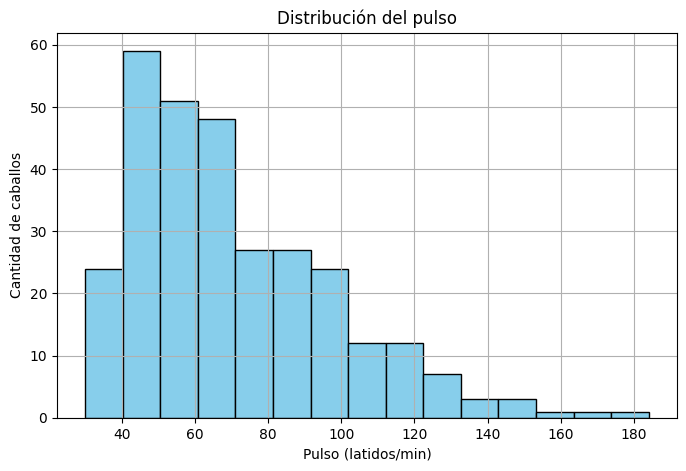

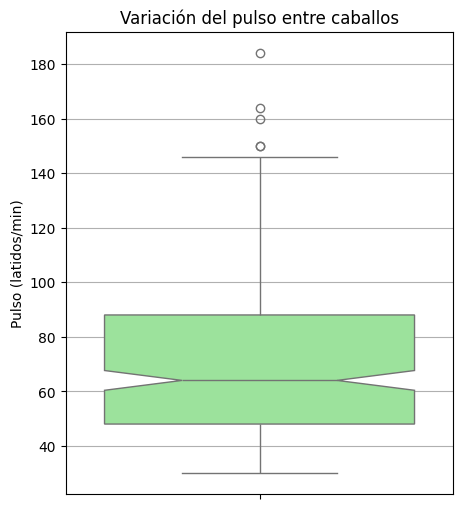

In [8]:
plt.figure(figsize=(8,5))
plt.hist(horse_dataset["Pulse"].dropna(), bins=15, color="skyblue", edgecolor="black")
plt.title("Distribución del pulso")
plt.xlabel("Pulso (latidos/min)")
plt.ylabel("Cantidad de caballos")
plt.grid(True)
plt.show()

plt.figure(figsize=(5,6))
sns.boxplot(y=horse_dataset["Pulse"], color="lightgreen",notch = True)
plt.title("Variación del pulso entre caballos")
plt.ylabel("Pulso (latidos/min)")
plt.grid(True, axis="y")
plt.show()

construimos una serie de histogramas mostrando la distribución de las features

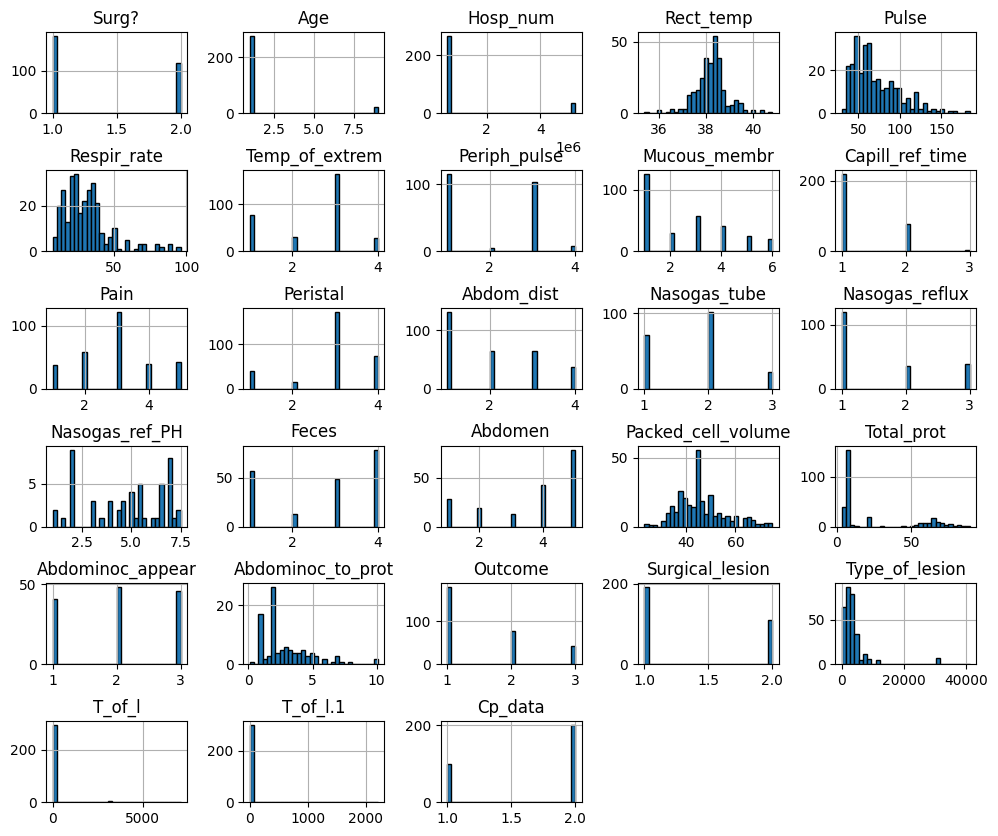

In [9]:
horse_dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Matris de scatter plort para variables cuantis

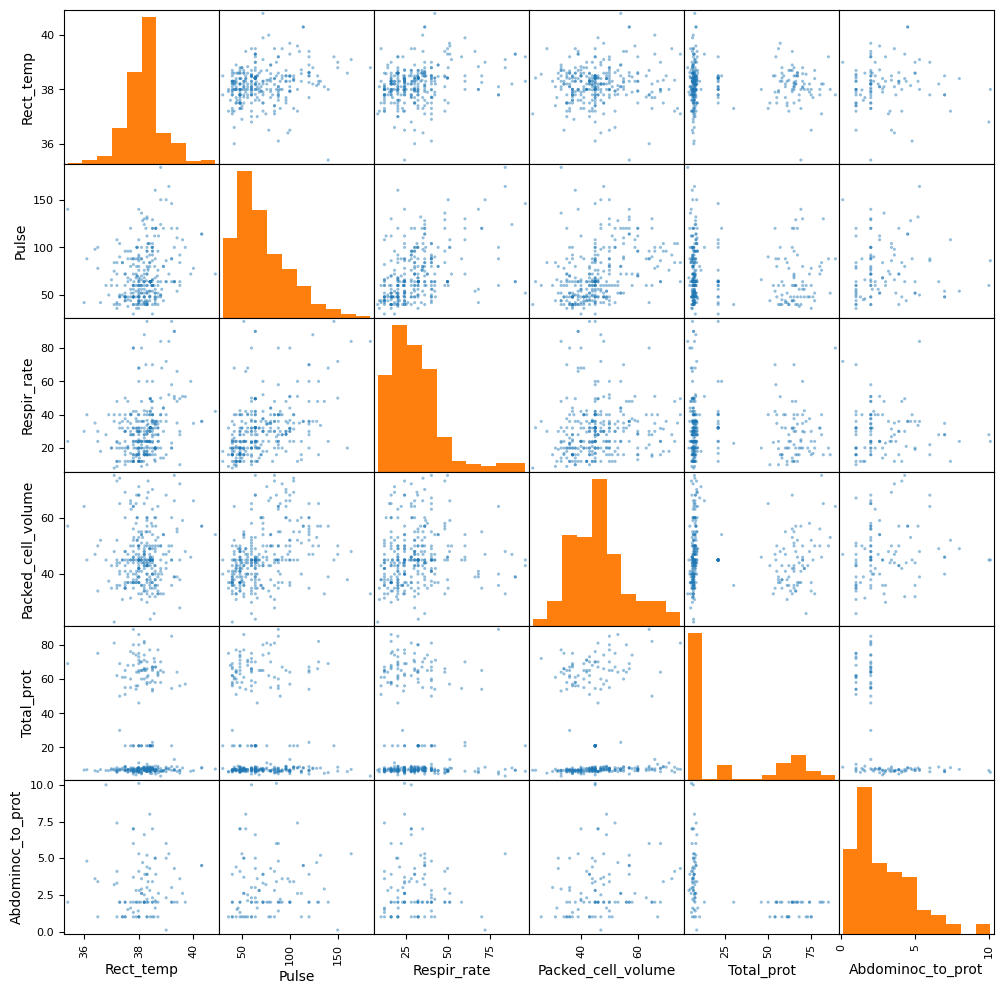

In [10]:
#Seleccionamos las columnas numéricas
cuantis= ["Rect_temp", "Pulse", "Respir_rate", "Packed_cell_volume", "Total_prot", "Abdominoc_to_prot"]
numeric_cols = horse_dataset[cuantis]

# Creamos el scatter matrix
axs = pd.plotting.scatter_matrix(numeric_cols, figsize=(12, 12), alpha=0.47, hist_kwds={"color":"#ff7f0e"}, s= 20)

#Mostramos por pantalla
for i in range(len(cuantis)):
    plt.show()

Scatterplot sobre las variables cuantitativas

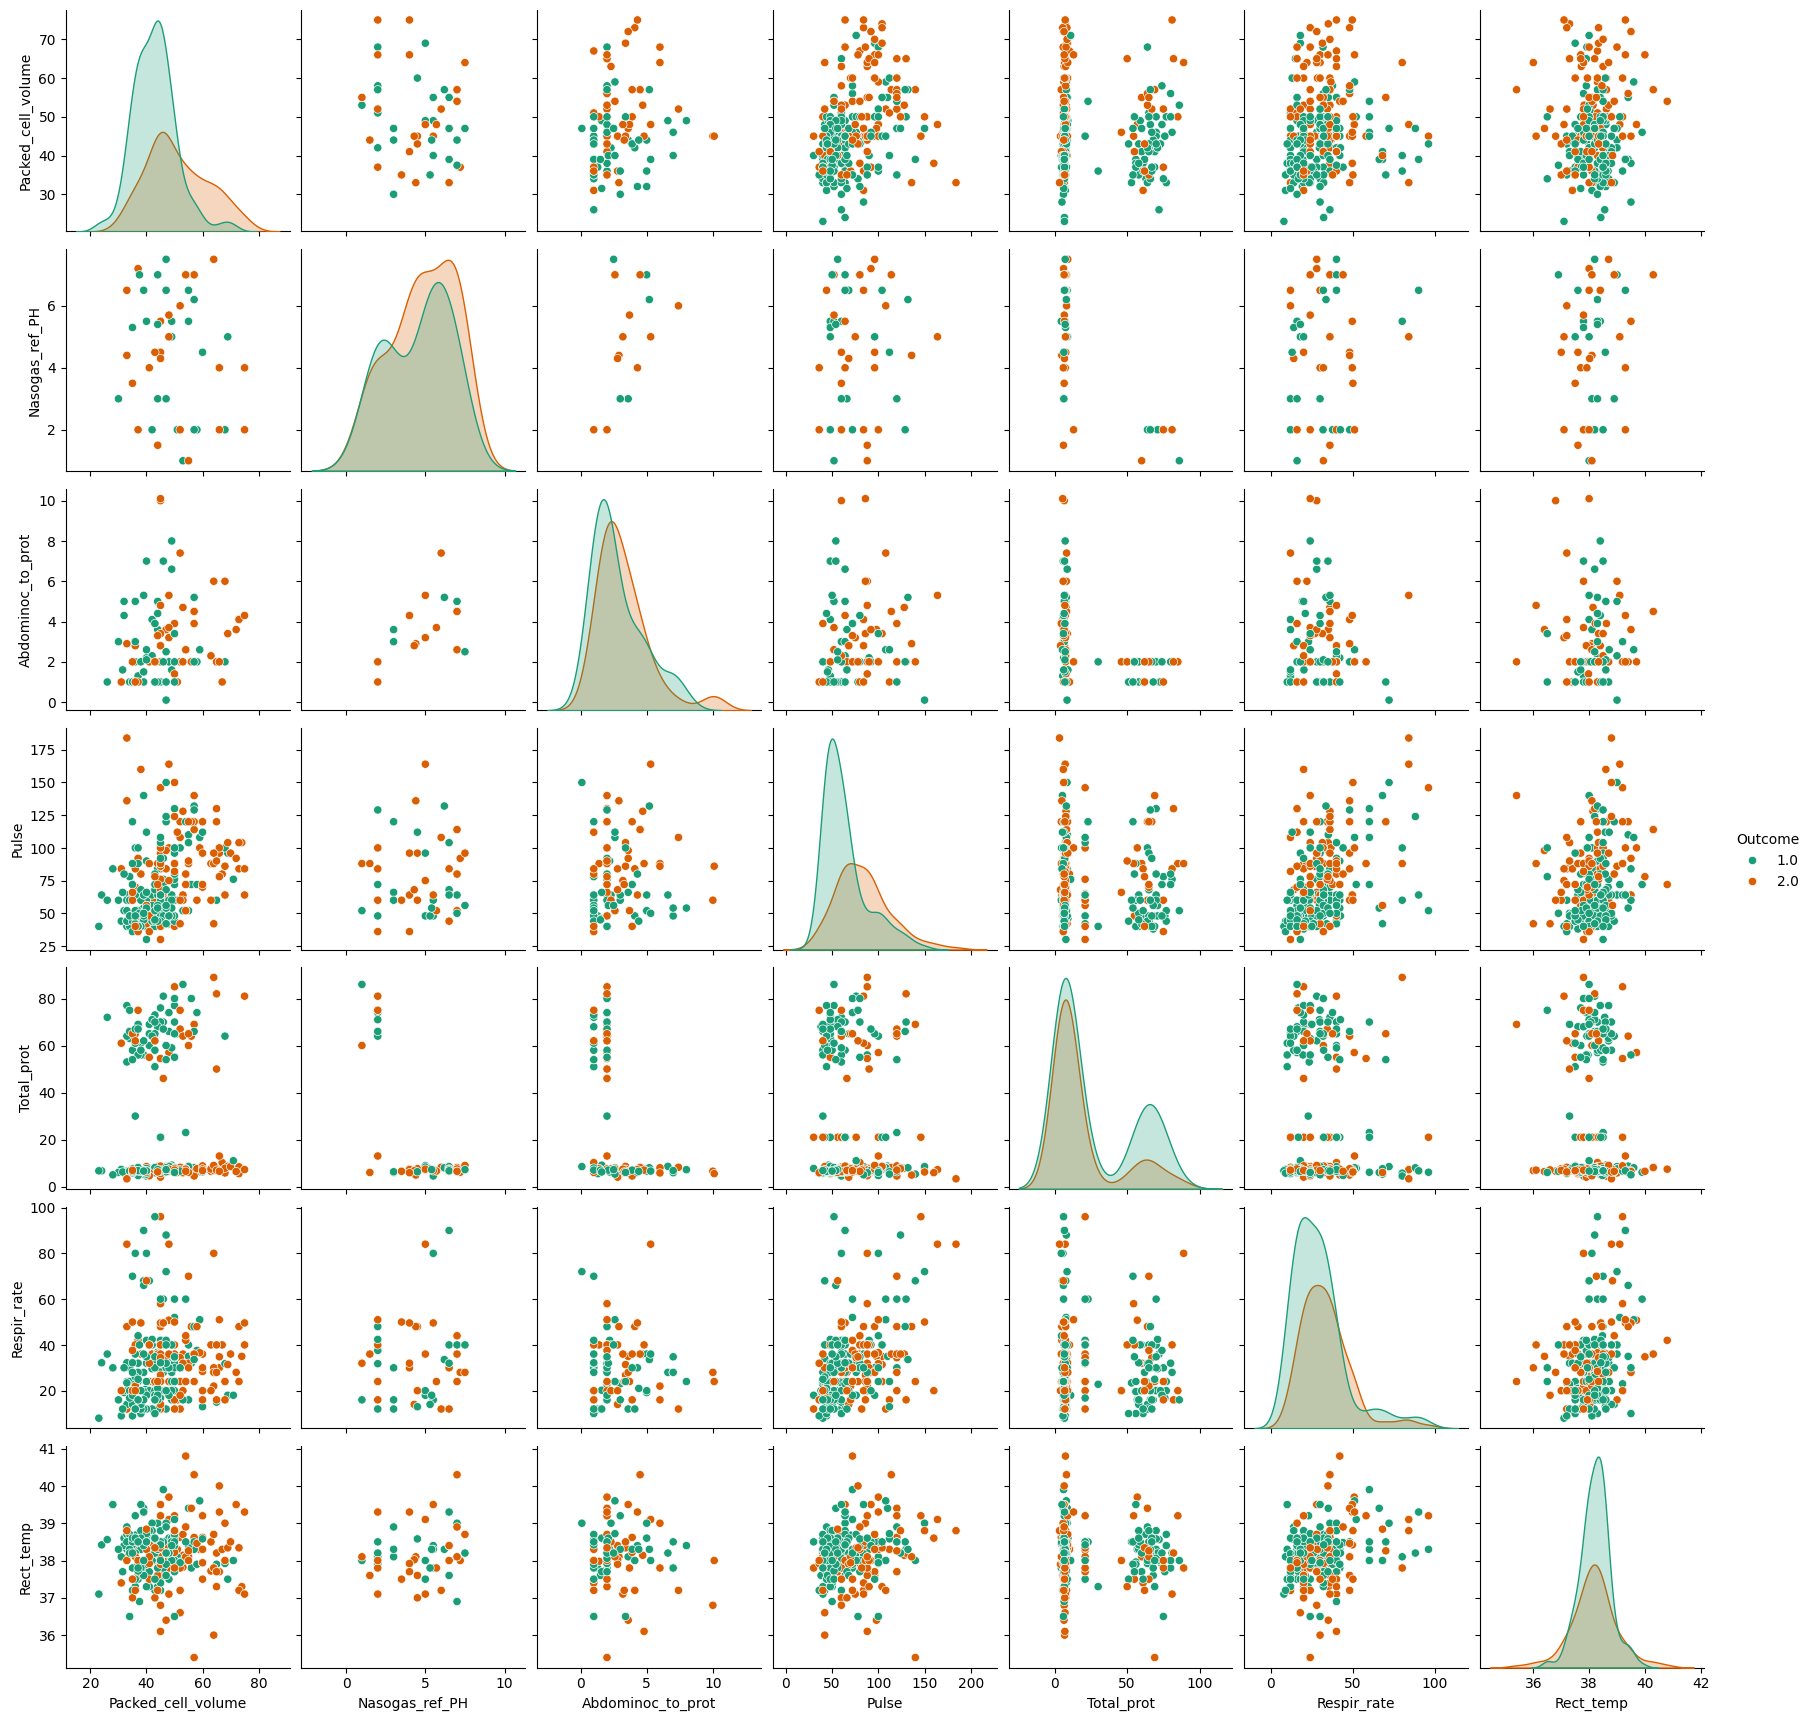

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
horse_dataset2 = horse_dataset.copy()
horse_dataset2.loc[horse_dataset2["Outcome"] == 3, "Outcome"] = 2

columnas_cuantitativas = ["Packed_cell_volume", "Nasogas_ref_PH", "Abdominoc_to_prot", "Pulse", "Total_prot", "Respir_rate", "Rect_temp"]

columna_para_el_color = "Outcome"

sns.pairplot(
    horse_dataset2,
    vars=columnas_cuantitativas,
    hue=columna_para_el_color,
    palette="Dark2"
)

plt.show()
plt.show()

Scatterplot comparando la variables cuanti y cuali sobre las cuanti únicamente.

al expandirse pueden apreciarse mejor los detalles

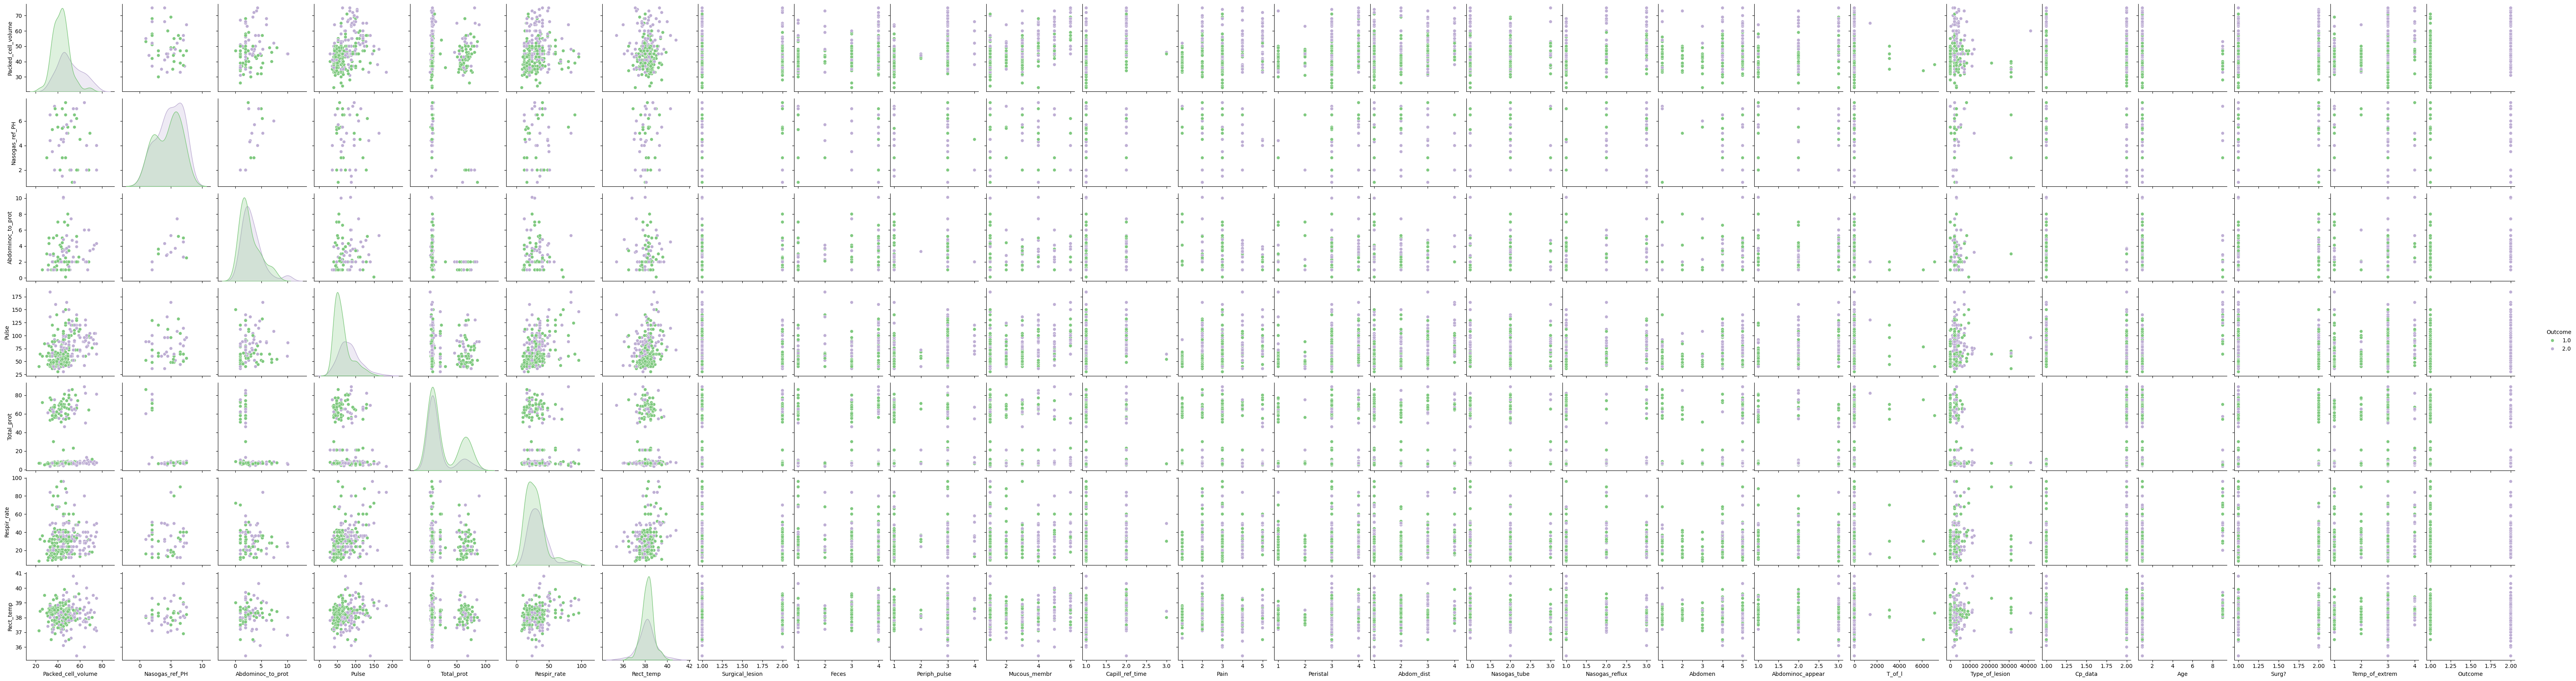

In [12]:
columna_cualitativa_principal = ["Surgical_lesion","Feces","Periph_pulse","Mucous_membr","Capill_ref_time","Pain","Peristal","Abdom_dist","Nasogas_tube","Nasogas_reflux","Abdomen","Abdominoc_appear","T_of_l","Type_of_lesion","Cp_data","Age","Surg?", "Temp_of_extrem","Outcome"]
sns.pairplot(horse_dataset2,
    x_vars=columnas_cuantitativas + columna_cualitativa_principal,
    y_vars=columnas_cuantitativas,
    hue=columna_para_el_color,
    palette="Accent"
    )
plt.show()

Gráfico de barras agrupado (catplot) para visualizar la relación entre "Pain" y "Outcome

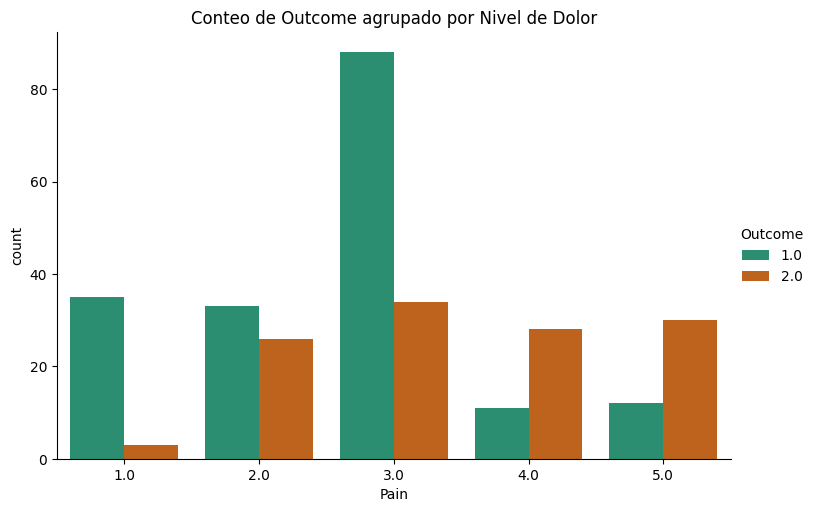

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(
    data= horse_dataset2,
    x="Pain",
    hue="Outcome",
    kind="count",
    palette="Dark2",
    height=5,
    aspect=1.5
)

plt.title("Conteo de Outcome agrupado por Nivel de Dolor")
plt.show()

Gráfico de barras agrupado (catplot) para visualizar la relación entre "Capill_ref_time" y "Outcome"

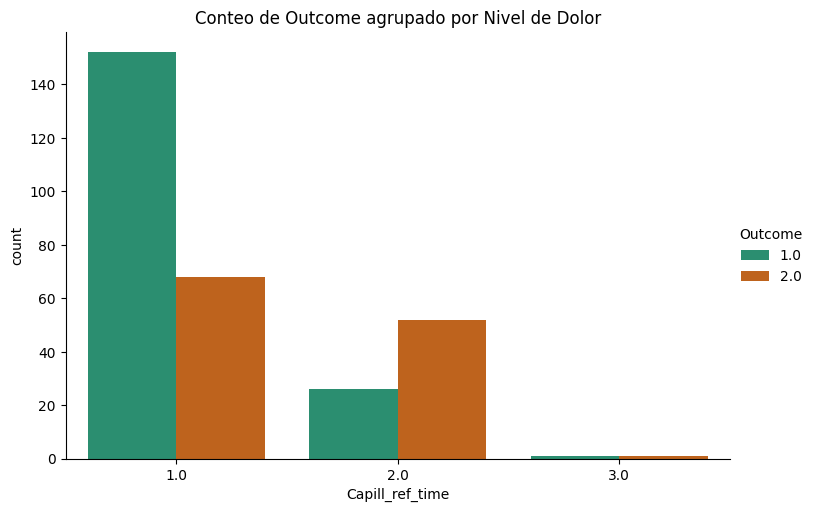

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(
    data= horse_dataset2,
    x="Capill_ref_time",
    hue="Outcome",
    kind="count",
    palette="Dark2",
    height=5,
    aspect=1.5
)

plt.title("Conteo de Outcome agrupado por Nivel de Dolor")
plt.show()

In [15]:
#Detectamos dos valores atipicos para la variable Capill_ref_time
horse_dataset2["Capill_ref_time"].value_counts()
horse_dataset2[horse_dataset2["Capill_ref_time"]== 3]

Surg?  Age  Hosp_num  Rect_temp  Pulse  Respir_rate  Temp_of_extrem  \
78    1.0    1    530693      38.42   64.0         49.6             3.0   
85    2.0    1    529304      38.00   54.0         30.0             2.0   

    Periph_pulse  Mucous_membr  Capill_ref_time  Pain  Peristal  Abdom_dist  \
78           3.0           3.0              3.0   5.0       3.0         3.0   
85           3.0           3.0              3.0   3.0       1.0         2.0   

    Nasogas_tube  Nasogas_reflux  Nasogas_ref_PH  Feces  Abdomen  \
78           3.0             2.0             NaN    4.0      5.0   
85           2.0             2.0             NaN    NaN      4.0   

    Packed_cell_volume  Total_prot  Abdominoc_appear  Abdominoc_to_prot  \
78                46.0         5.9               NaN                NaN   
85                45.0         6.2               NaN                NaN   

    Outcome  Surgical_lesion  Type_of_lesion  T_of_l  T_of_l.1  Cp_data  
78      2.0                1            3025       0         0        2  
85      1.0                2             400       0         0        2

Hacemos la matris de correlacion

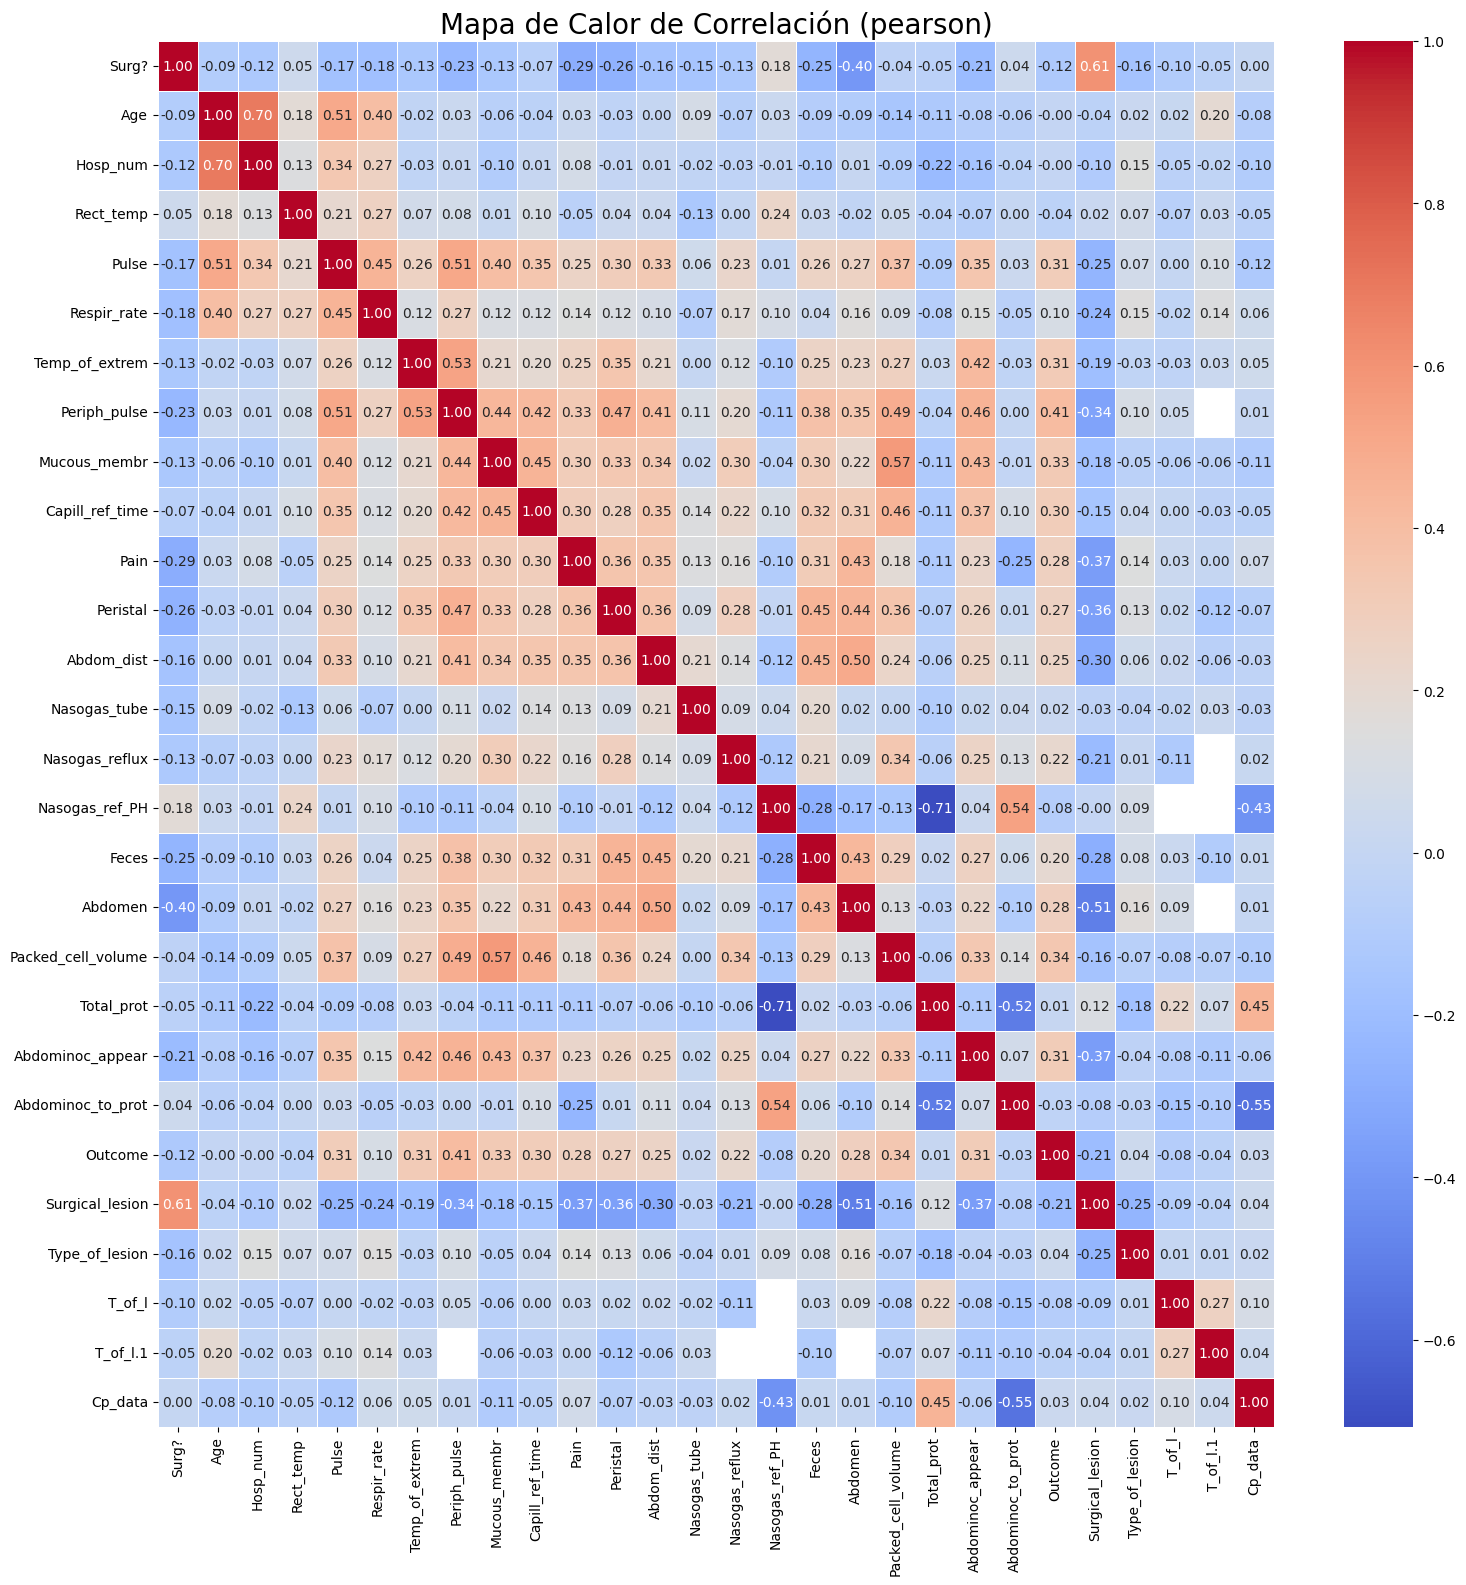

In [16]:
corr_matrix_pearson = horse_dataset.corr(method="pearson")
plt.figure(figsize=(18, 18))
sns.heatmap(
    corr_matrix_pearson,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=.5
)
plt.title("Mapa de Calor de Correlación (pearson)", fontsize=20)
plt.show()

Gráfico 1: Crea un gráfico de dispersión (scatter plot) para comparar la Proteína Total (plasma) contra la Proteína Abdominal.

Gráfico 2: Repite el mismo gráfico, pero "hace zoom" al limitar el eje X (xlim) a un rango de 0 a 15, para ver mejor la agrupación principal de datos.

Gráfico 3: Cuenta cuántos caballos hay de cada Edad, y crea un gráfico de barras (bar) mostrando ese conteo, reemplazando las etiquetas 1 y 2 por "Adulto" y "Potro".

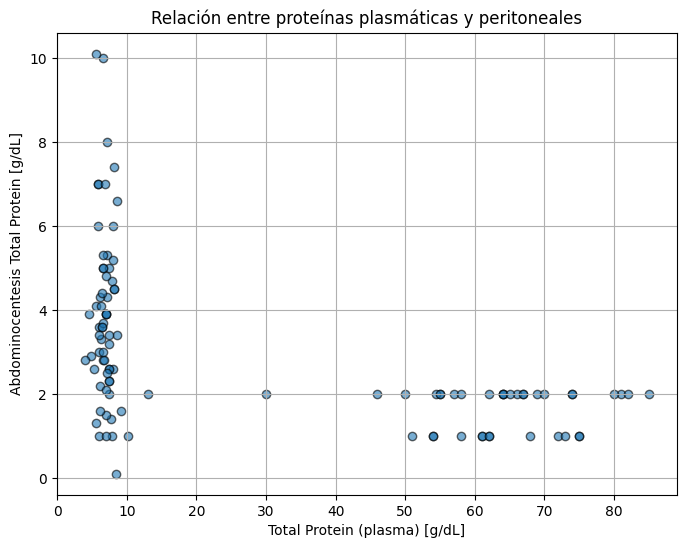

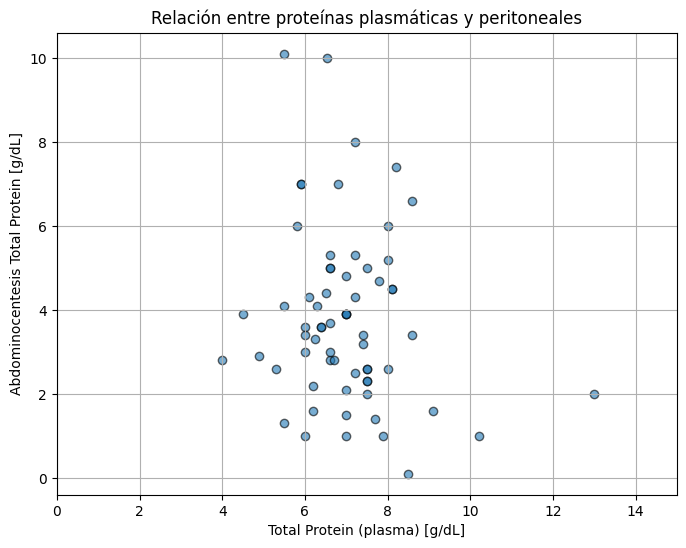

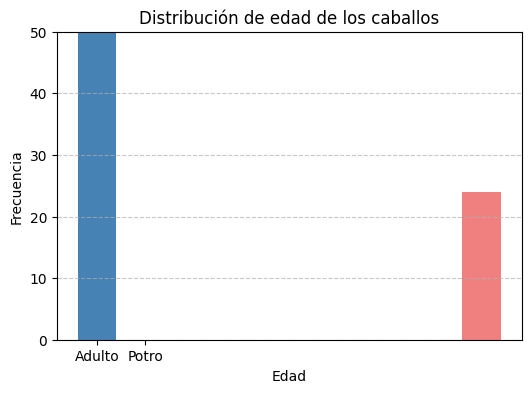

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(horse_dataset["Total_prot"], horse_dataset["Abdominoc_to_prot"], alpha=0.6, edgecolors="k")
plt.xlabel("Total Protein (plasma) [g/dL]")
plt.ylabel("Abdominocentesis Total Protein [g/dL]")
plt.title("Relación entre proteínas plasmáticas y peritoneales")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(horse_dataset["Total_prot"], horse_dataset["Abdominoc_to_prot"], alpha=0.6, edgecolors="k")
plt.xlabel("Total Protein (plasma) [g/dL]")
plt.ylabel("Abdominocentesis Total Protein [g/dL]")
plt.xlim(0,15)
plt.title("Relación entre proteínas plasmáticas y peritoneales")
plt.grid(True)
plt.show()

counts = horse_dataset["Age"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=["steelblue", "lightcoral"])
plt.xticks([1,2], ["Adulto", "Potro"])
plt.title("Distribución de edad de los caballos")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.ylim(0,50)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Si bien vemos los valores atipicos de la variable "Age" (age = 9). no tenemos datos con otras variables para determinar que sean adultos o potros

Reduccion de dimensionalidad por PCA (Metodo lineal)

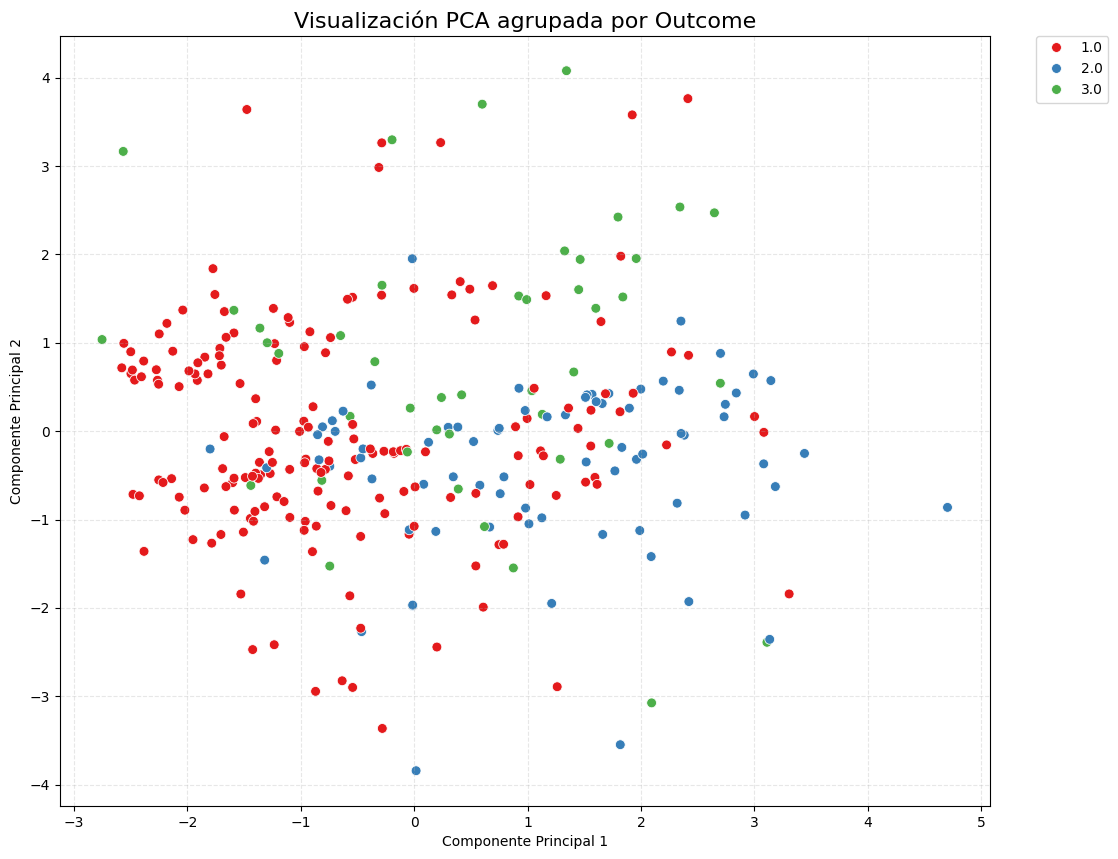

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

target_col = "Outcome"
numeric_features = ["Rect_temp", "Pulse", "Respir_rate", "Packed_cell_volume","Total_prot", "Abdominoc_to_prot", "Nasogas_ref_PH"]

categorical_features = ["Surgical_lesion", "Feces", "Periph_pulse", "Mucous_membr", "Capill_ref_time", "Pain", "Peristal", "Abdom_dist", "Nasogas_tube", "Nasogas_reflux", "Abdomen", "Abdominoc_appear", "T_of_l", "Type_of_lesion", "Cp_data", "Age"]

df_for_pca = horse_dataset.replace("?", np.nan)

for col in numeric_features:
    df_for_pca[col] = pd.to_numeric(df_for_pca[col])

df_for_pca[target_col] = df_for_pca[target_col].fillna("Desconocido")

numeric_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
preprocessor = make_column_transformer(
    (numeric_pipeline, numeric_features),
    (categorical_pipeline, categorical_features),
    remainder='drop' 
)
X_features = df_for_pca[numeric_features + categorical_features]
y_target = df_for_pca[target_col]

X_processed = preprocessor.fit_transform(X_features)
reducer = PCA(
    n_components=2,
    random_state=42
)
embedding = reducer.fit_transform(X_processed)

df_result = pd.DataFrame(embedding, columns=["PCA_1", "PCA_2"])
df_result["Outcome"] = df_for_pca[target_col].values


plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_result,
    x="PCA_1",
    y="PCA_2",
    hue="Outcome",
    palette="Set1",
    s=50,
)

plt.title("Visualización PCA agrupada por Outcome", fontsize=16)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

Reduccion de dimensionalidad por T-SNE (Metodo no Lineal)

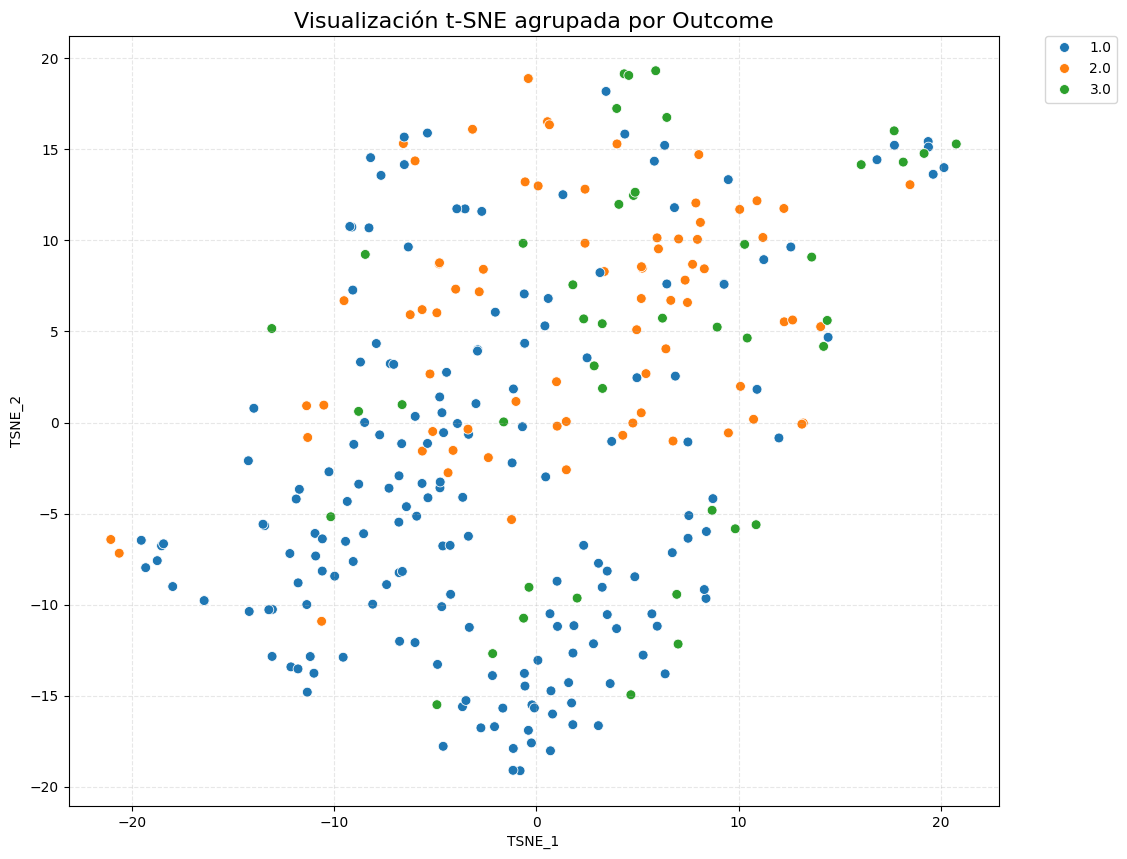

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

target_col = "Outcome"
numeric_features = ["Rect_temp", "Pulse", "Respir_rate", "Packed_cell_volume", "Total_prot", "Abdominoc_to_prot", "Nasogas_ref_PH"]

categorical_features = ["Surgical_lesion", "Feces", "Periph_pulse", "Mucous_membr", "Capill_ref_time", "Pain", "Peristal", "Abdom_dist", "Nasogas_tube",
                        "Nasogas_reflux", "Abdomen", "Abdominoc_appear", "T_of_l", "Type_of_lesion", "Cp_data", "Age"]

df_for_tsne = horse_dataset.replace("?", np.nan)
#Convertimos columnas numéricas a "float"
for col in numeric_features:
    df_for_tsne[col] = pd.to_numeric(df_for_tsne[col])

numeric_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer(
    (numeric_pipeline, numeric_features),
    (categorical_pipeline, categorical_features),
    remainder='drop')

df_for_tsne[target_col] = df_for_tsne[target_col].fillna("Desconocido")
X_features = df_for_tsne[numeric_features + categorical_features]
X_processed = preprocessor.fit_transform(X_features)
reducer = TSNE(
    n_components=2,
    perplexity=30.0,
    init="random",
    random_state=42,
    max_iter=2000
    )
embedding = reducer.fit_transform(X_processed)
df_result = pd.DataFrame(embedding, columns=["TSNE_1", "TSNE_2"])
df_result["Outcome"] = df_for_tsne[target_col].values

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_result,
    x="TSNE_1",
    y="TSNE_2",
    hue="Outcome",
    palette="tab10",
    s=50,
)
plt.title("Visualización t-SNE agrupada por Outcome", fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

Plantiamiento y desarrollo de las Hipotesis

Primera hipótesis 

La mayoría de los caballos en este conjunto de datos no sobreviven; es decir, la suma de los caballos que mueren (outcome=2) y los que son sacrificados (outcome=3) es mayor que la de los que viven (outcome=1)

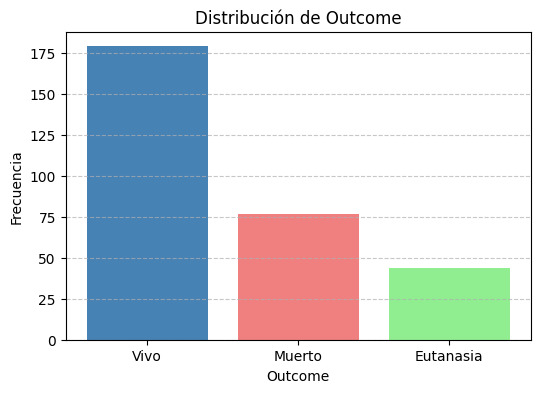

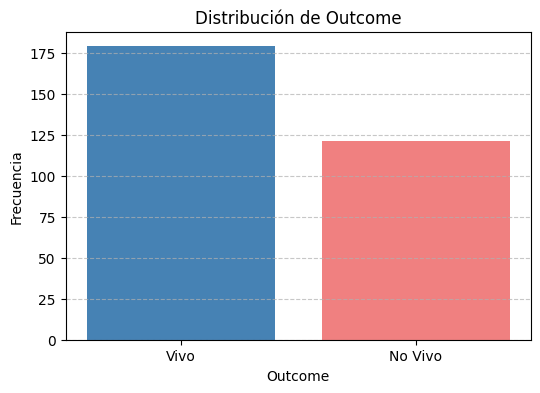

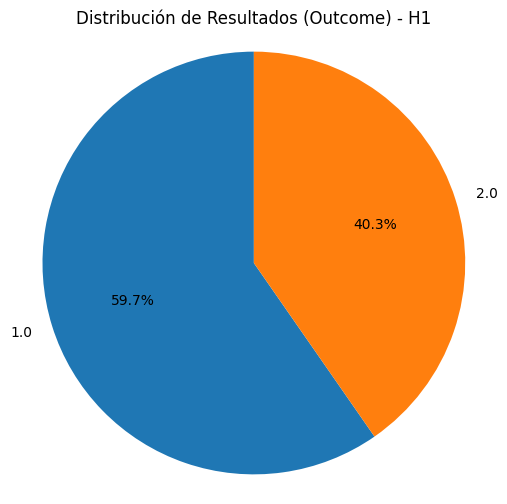

In [20]:
hipo1data = horse_dataset[["Outcome","Pulse"]]

counts = hipo1data["Outcome"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=["steelblue", "lightcoral","lightgreen"])
plt.xticks([1,2,3], ["Vivo", "Muerto", "Eutanasia"])
plt.title("Distribución de Outcome")
plt.xlabel("Outcome")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

counts2 = counts.copy()
counts2[1] = counts[1]
counts2[2] = counts2[2]+counts2[3]
del counts2[3]


plt.figure(figsize=(6,4))
plt.bar(counts2.index, counts2.values, color=["steelblue", "lightcoral","lightgreen"])
plt.xticks([1,2], ["Vivo", "No Vivo"])
plt.title("Distribución de Outcome")
plt.xlabel("Outcome")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(6, 6))
plt.pie(
    counts2.values,
    labels=counts2.index,
    autopct="%1.1f%%",
    startangle = 90
)
plt.title("Distribución de Resultados (Outcome) - H1")
plt.axis("equal")
plt.show()

Viendo el gráfico 2 se puede corroborar que la hipótesis inicial resulta ser falsa, siendo que la mayoría de los caballos sobreviven al proceso.

Se rechaza la hipótesis. Contrario a la suposición inicial, la mayoría de los caballos en este dataset sobrevivieron.

Hipótesis 2: 

La media del pulso (pulse) de los caballos en el dataset es significativamente superior al pulso normal en reposo (44 lpm).

Técnica: Test T de una muestra (One-Sample T-test).

Pasos: Establecemos la hipótesis nula (H0) como: "La media del pulso es igual a 44"

Establecemos la hipótesis alternativa (H1) como: "La media del pulso es mayor a 44".

Ejecutamos el T-test sobre la columna pulse (limpia) comparándola con el valor poblacional mu=44.




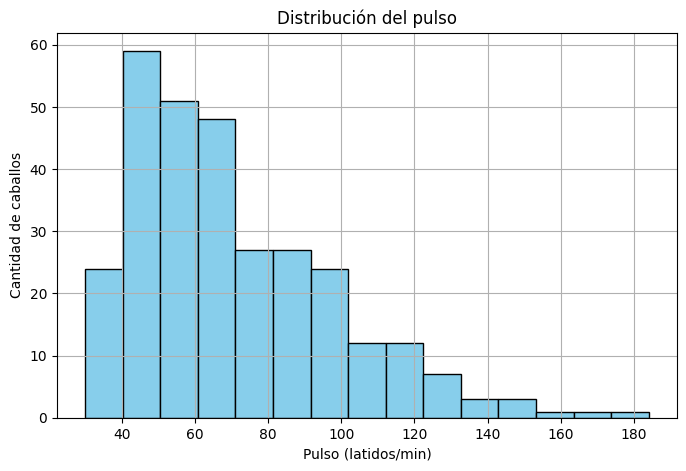

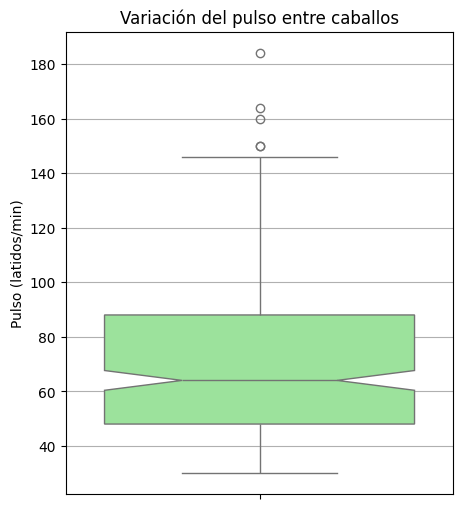

In [21]:
plt.figure(figsize=(8,5))
plt.hist(hipo1data["Pulse"], bins=15, color="skyblue", edgecolor="black")
plt.title("Distribución del pulso")
plt.xlabel("Pulso (latidos/min)")
plt.ylabel("Cantidad de caballos")
plt.grid(True)
plt.show()

plt.figure(figsize=(5,6))
sns.boxplot(y=hipo1data["Pulse"], color="lightgreen",notch = True)
plt.title("Variación del pulso entre caballos")
plt.ylabel("Pulso (latidos/min)")
plt.grid(True, axis="y")
plt.show()

In [22]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(hipo1data["Pulse"],44)
alpha = 0.01
if p_value > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la longitud del sépalo entre Setosa y Virginica.")
else:
    print("Se rechaza la hipótesis nula.")
    print(f"p_valor: {p_value:.3f}")

Se rechaza la hipótesis nula.
p_valor: 0.000


Ya que el p_valor es menor a 0.01 se procede a rechazar la hipótesis nula ("La media del pulso es igual a 44"), por lo que se valida la hipótesis inicial ("La media del pulso (pulse) de los caballos en el dataset es significativamente superior al pulso normal en reposo (44 lpm)").


Hipótesis 3: 

Los caballos que mueren o son sacrificados (outcome = 2 o 3) tienen, en promedio, un pulso (pulse) significativamente más alto que los caballos que sobreviven (outcome = 1).

Pasos:

Visualización: Generar Boxplots de pulse agrupados por las 3 categorías de outcome.

Test Estadístico: Realizar un test ANOVA (o Kruskal-Wallis si los datos no cumplen supuestos de normalidad) para comparar las medias de pulse entre los 3 grupos.

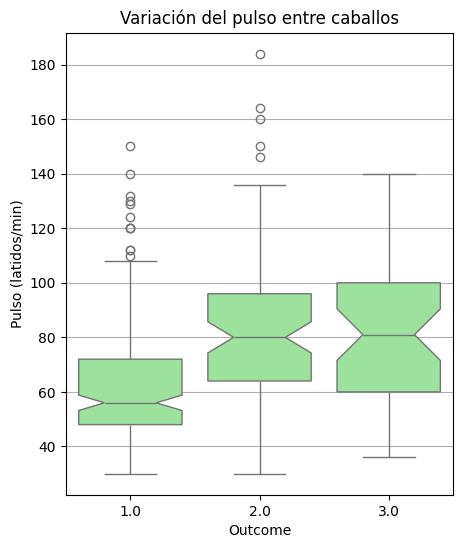

In [23]:
tabla = pd.crosstab(hipo1data["Pulse"], hipo1data["Outcome"])

plt.figure(figsize=(5,6))
sns.boxplot(y=hipo1data["Pulse"], x=hipo1data["Outcome"], color="lightgreen", notch=True)
plt.title("Variación del pulso entre caballos")
plt.ylabel("Pulso (latidos/min)")
plt.grid(True, axis="y")
plt.show()



Pre Procesamiento de las hipotesis 1 al 3
DE SER NECESARIO

In [24]:
from scipy.stats import shapiro
caballos_vivos = hipo1data[hipo1data["Outcome"] == 1]
#Test de shapiro-wilk para caballos vivos
stat, p = shapiro(caballos_vivos["Pulse"])
print(f"Test de Shapiro-Wilk para caballos vivos: Estadístico={stat:.3f}, p-valor={p:.3f}")

caballos_muertos = hipo1data[hipo1data["Outcome"] == 2]
#Test de shapiro-wilk para caballos muertos
stat, p = shapiro(caballos_muertos["Pulse"])
print(f"Test de Shapiro-Wilk para caballos muertos: Estadístico={stat:.3f}, p-valor={p:.3f}")

caballos_sacrificados = hipo1data[hipo1data["Outcome"] == 3]
#Test de shapiro-wilk para caballos sacrificados
stat, p = shapiro(caballos_sacrificados["Pulse"])
print(f"Test de Shapiro-Wilk para caballos sacrificados: Estadístico={stat:.3f}, p-valor={p}")

Test de Shapiro-Wilk para caballos vivos: Estadístico=0.846, p-valor=0.000
Test de Shapiro-Wilk para caballos muertos: Estadístico=0.928, p-valor=0.000
Test de Shapiro-Wilk para caballos sacrificados: Estadístico=0.978, p-valor=0.5557470973161519


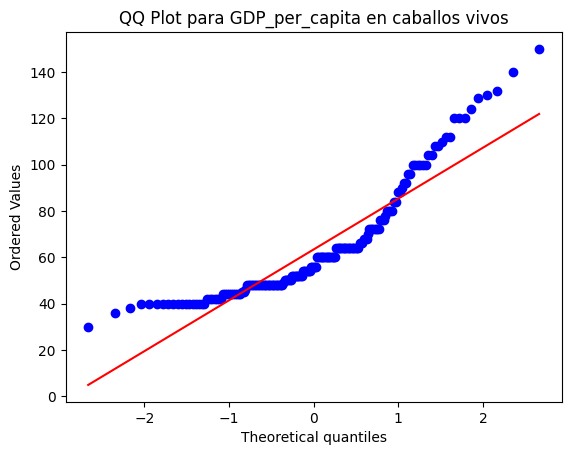

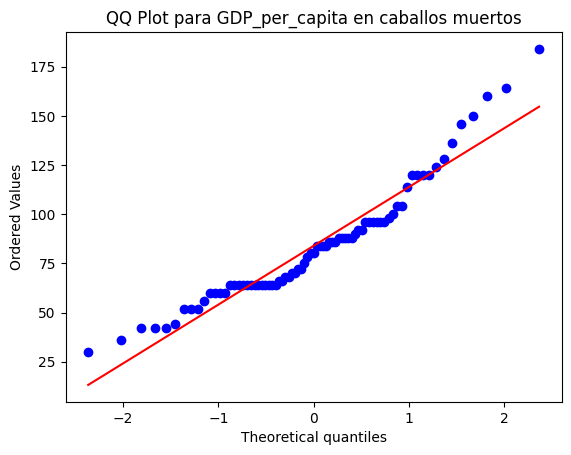

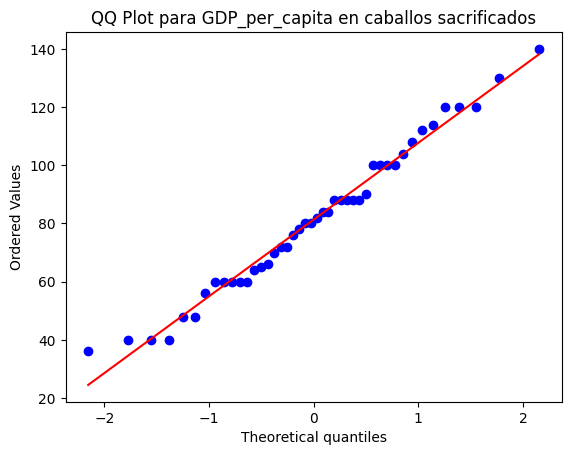

In [25]:
#QQ-plot para caballos vivos
stats.probplot(caballos_vivos["Pulse"], dist="norm", plot=plt)
plt.title("QQ Plot para GDP_per_capita en caballos vivos")
plt.show()


#QQ-plot para caballos muertos
stats.probplot(caballos_muertos["Pulse"], dist="norm", plot=plt)
plt.title("QQ Plot para GDP_per_capita en caballos muertos")
plt.show()


#QQ-plot para caballos sacrificados
stats.probplot(caballos_sacrificados["Pulse"], dist="norm", plot=plt)
plt.title("QQ Plot para GDP_per_capita en caballos sacrificados")
plt.show()

Con el QQ plot es más claro

In [48]:
#Test de Levene para comparar si hay homocedasticidad
stat, p = stats.levene(caballos_vivos["Pulse"], caballos_muertos["Pulse"])
print(f"Test de Levene para vivos-muertos: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(caballos_vivos["Pulse"], caballos_sacrificados["Pulse"])
print(f"Test de Levene para vivos-sacrificados: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para vivos-muertos: Estadístico=5.662, p-valor=0.018
Test de Levene para vivos-sacrificados: Estadístico=1.766, p-valor=0.185


Ya que no hay normalidad pasamos a evaluar con Kruskal-Wallis

In [27]:
#Test de Kruskal-Wallis
stat, p = stats.kruskal(caballos_vivos["Pulse"], caballos_muertos["Pulse"], caballos_sacrificados["Pulse"])
print(f"Test de Kruskal-Wallis para pulso de caballos vivos, muertos y sacrificados: Estadístico={stat:.3f}, p-valor={p:.3f}")

alpha = 0.01
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el pulso de caballos vivos, muertos y sacrificados.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el pulso de caballos vivos, muertos y sacrificados.")

Test de Kruskal-Wallis para pulso de caballos vivos, muertos y sacrificados: Estadístico=43.640, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el pulso de caballos vivos, muertos y sacrificados.


Por Kruskal-Wallis se rechaza la hipótesis nula, por lo que se procede a aceptar la hipótesis inicial. Es decir, Los caballos que mueren o son sacrificados (outcome = 2 o 3) tienen, en promedio, un pulso (pulse) significativamente más alto que los caballos que sobreviven 
(outcome = 1).

En otras palabras: Se confirma la hipótesis. Un pulso elevado está fuertemente asociado con un pronóstico negativo.

Test de Shapiro-Wilk para Packed cell volume: Estadístico=0.950, p-valor=1.3903385679925845e-08


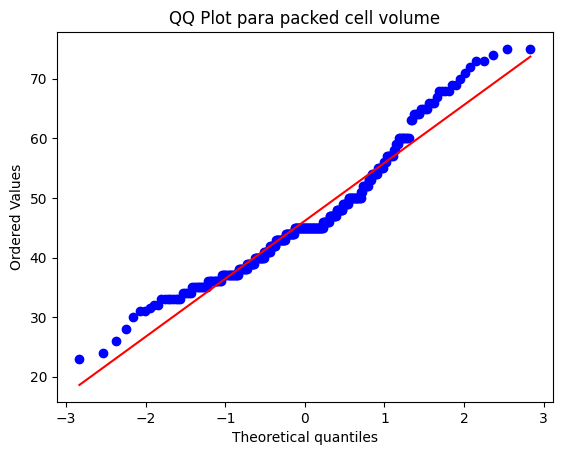

Test de Shapiro-Wilk para Total protein: Estadístico=0.677, p-valor=1.4573540379693252e-23


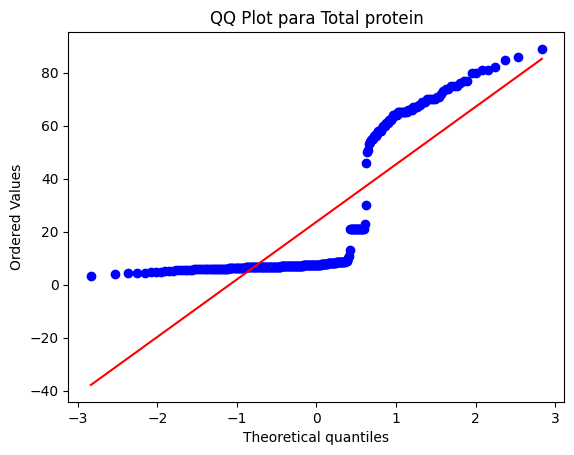

Test de Shapiro-Wilk para Pulse: Estadístico=0.908, p-valor=1.3864399811435838e-12


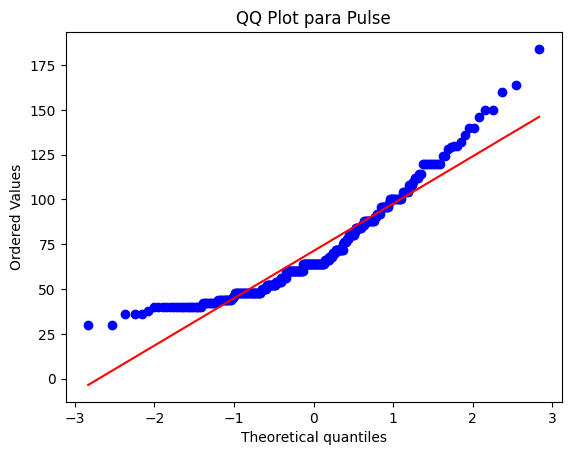

Test de Shapiro-Wilk para Rectal temperature: Estadístico=0.963, p-valor=6.361826539632466e-07


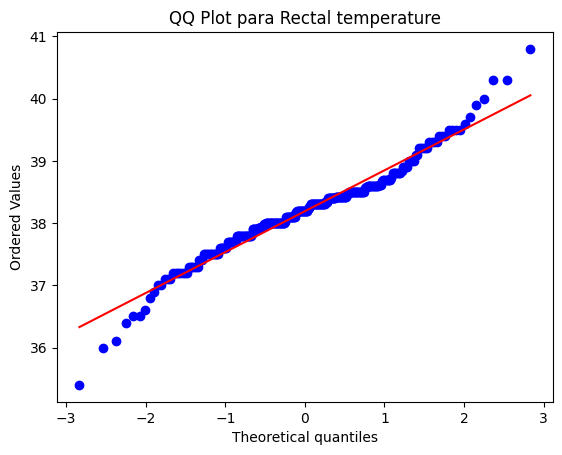

In [28]:
#Test de shapiro-wilk
stat, p = shapiro(horse_dataset["Packed_cell_volume"])
print(f"Test de Shapiro-Wilk para Packed cell volume: Estadístico={stat:.3f}, p-valor={p}")

#QQ-plot
stats.probplot(horse_dataset["Packed_cell_volume"], dist="norm", plot=plt)
plt.title("QQ Plot para packed cell volume")
plt.show()

#Test de shapiro-wilk
stat, p = shapiro(horse_dataset["Total_prot"])
print(f"Test de Shapiro-Wilk para Total protein: Estadístico={stat:.3f}, p-valor={p}")

#QQ-plot
stats.probplot(horse_dataset["Total_prot"], dist="norm", plot=plt)
plt.title("QQ Plot para Total protein")
plt.show()

#Test de shapiro-wilk
stat, p = shapiro(horse_dataset["Pulse"])
print(f"Test de Shapiro-Wilk para Pulse: Estadístico={stat:.3f}, p-valor={p}")

#QQ-plot
stats.probplot(horse_dataset["Pulse"], dist="norm", plot=plt)
plt.title("QQ Plot para Pulse")
plt.show()

#Test de shapiro-wilk
stat, p = shapiro(horse_dataset["Rect_temp"])
print(f"Test de Shapiro-Wilk para Rectal temperature: Estadístico={stat:.3f}, p-valor={p}")

#QQ-plot
stats.probplot(horse_dataset["Rect_temp"], dist="norm", plot=plt)
plt.title("QQ Plot para Rectal temperature")
plt.show()


Definimos los datagrams con los que trabajaremos las siguientes hipotesis

In [29]:
hipo4data = horse_dataset[["Pain","Surgical_lesion"]]
hipo5data = horse_dataset[["Packed_cell_volume","Total_prot"]]
hipo6data = horse_dataset[["Outcome","Pulse","Pain","Packed_cell_volume","Rect_temp","Peristal"]]

Escalamos la columna de Packed_cell_volume ya que la usamos tanto en la hipótesis 5 como en la 6.

In [30]:
from sklearn.preprocessing import StandardScaler

#Seleccionamos las columnas numéricas para la normalización
numeric_cols = horse_dataset.select_dtypes(include=np.number).columns

#Creamos un objeto StandarScaler
scaler = StandardScaler()

#Ajustamos el scaler a los datos y transformamos los datos
horse_dataset["Packed_cell_volume"] = scaler.fit_transform(horse_dataset[["Packed_cell_volume"]])

Hipótesis 4: 

Existe una asociación significativa entre el nivel de dolor (pain) y si el caballo presentaba una lesión quirúrgica (surgical_lesion = 1).

Definimos hipótesis nula: No hay una asociación significativa entre el nivel de dolor y si el caballo requirió una lesión quirúrgica. Hipótesis alternativa: Hay una asociación significativa entre dolor y si requirió una lesión quirúrgica.

In [31]:
tabla_contin = pd.crosstab(hipo4data["Pain"],hipo4data["Surgical_lesion"])
tabla_contin

Surgical_lesion   1   2
Pain                   
1.0               6  32
2.0              38  21
3.0              78  44
4.0              32   7
5.0              37   5

Armamos la tabla de contingencia para las variables de Pain y Surgical_lesion

In [32]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contin)

print(f"Chi-cuadrado: {chi2:.3f}")
print(f"Grados de libertad: {dof}")
print(f"p-valor: {p:.5f}")

Chi-cuadrado: 54.206
Grados de libertad: 4
p-valor: 0.00000


Por lo tanto, se confirma la hipótesis. Existe una asociación estadística fuerte entre el nivel de dolor reportado y la determinación de que el caballo tiene una lesión quirúrgica.

Hipótesis 5: 

Existe una correlación positiva fuerte entre el volumen de células empaquetadas (packed_cell_volume) y la proteína total (total_protein).


Escalamos la variable Total protein en el dataframe de la hipótesis 5.




In [ ]:
hipo5data[:, "Total_prot"] = scaler.fit_transform(hipo5data[["Total_prot"]])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19116\2568948665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hipo5data["Total_prot"] = scaler.fit_transform(hipo5data[["Total_prot"]])


Genera un gráfico de dispersión (scatter plot) para visualizar la relación entre dos variables numéricas: "Packed_cell_volume" y "Total_prot".

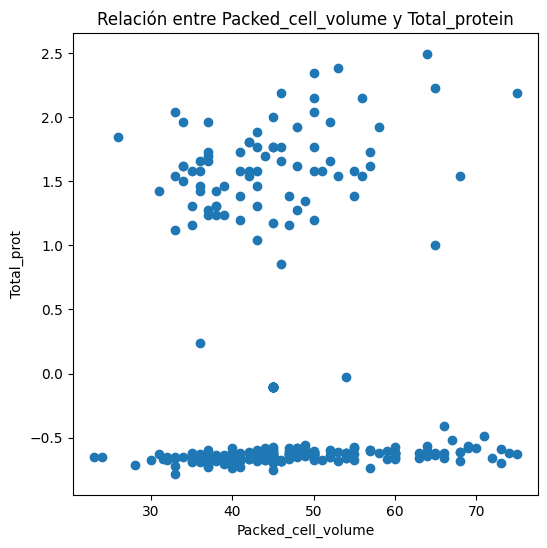

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(hipo5data["Packed_cell_volume"], hipo5data["Total_prot"])

plt.xlabel("Packed_cell_volume")
plt.ylabel("Total_prot")

plt.title("Relación entre Packed_cell_volume y Total_protein")

plt.show()

In [35]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(
    hipo5data["Packed_cell_volume"],
    hipo5data["Total_prot"]
)

print("Correlación de Pearson:", corr)
print("p-valor:", p_value)

Correlación de Pearson: -0.06065026474745418
p-valor: 0.2950663107455949


Por lo tanto, se rechaza la hipótesis. No se encontró evidencia estadística que respalde la presencia de una correlación significativa entre el volumen de células empaquetadas y la proteína total, validando que ambos miden un constructo similar (deshidratación).

Hipótesis 6:

El resultado final del caballo (outcome) puede ser predicho con una precisión superior al azar utilizando una combinación de variables de diagnóstico temprano: pulse, pain, rectal_temperature, peristal y packed_cell_volume.

Escalamos las variables para la hipótesis 6.

In [ ]:
numeric_cols = ["Pulse", "Rect_temp"]

hipo6data[:, numeric_cols] = scaler.fit_transform(hipo6data[numeric_cols])

moda_out = hipo6data["Peristal"].mode()
hipo6data["Peristal"] = hipo6data["Peristal"].fillna(moda_out[0])


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19116\4165013629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hipo6data[numeric_cols] = scaler.fit_transform(hipo6data[numeric_cols])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19116\4165013629.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origina

Transformamos la variable Pain categorica a cuanti, utilizando dummy encoding

In [37]:
hipo6data = pd.get_dummies(hipo6data, columns=["Pain"], drop_first=True)

In [38]:
hipo6data.loc[hipo6data["Outcome"] == 3, "Outcome"] = 2
hipo6data["Outcome"].value_counts()

Outcome
1.0    179
2.0    121
Name: count, dtype: int64

In [39]:
hipo6data = hipo6data.rename(columns={"Pain_2.0": "P_leve", "Pain_3.0" : "P_inter_mod", "Pain_4.0" : "P_inter_sev", "Pain_5.0" : "P_severo"})
hipo6data.head()

Outcome     Pulse  Packed_cell_volume  Rect_temp  Peristal  P_leve  \
0      2.0 -0.192031                45.0   0.462573       4.0   False   
1      2.0  0.608097                50.0   1.513647       4.0   False   
2      1.0 -1.137636                33.0   0.162266       3.0   False   
3      2.0  3.372175                48.0   1.363494       4.0    True   
4      2.0  1.190008                74.0  -1.339269       3.0   False   

   P_inter_mod  P_inter_sev  P_severo  
0        False        False      True  
1         True        False     False  
2         True        False     False  
3        False        False     False  
4         True        False     False

In [40]:
X_train = hipo6data.drop("Outcome", axis=1)
y_train = hipo6data["Outcome"]

Creamos el modelo de regresión logística y lo entrenamos

In [ ]:
from sklearn.linear_model import LogisticRegression

#Creamos un modelo de regresión logística
model = LogisticRegression(random_state=10, max_iter= 2000)

#Entrenamos el modelo con los datos de entrenamiento estandarizados
model.fit(X_train, y_train)

c:\Users\Usuario\Desktop\VSCode Facultad\Ciencias de datos\TPE\TpeEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

Ahora vamos a intentar ajustar los hiperparámetros del modelo usando gridSearch


In [42]:
from sklearn.model_selection import GridSearchCV

#Definimos los valores de alpha que queremos probar
param_grid = {"C": [0.9, 1, 1.2, 2, 5, 10]}

#Creamos un modelo de Regresión Logística
model = LogisticRegression(penalty="l2", max_iter=20000, random_state=10)

#Creamos un objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

#Ajustamos el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

#Imprimimos los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)
#Imprimimos la mejor exactitud encontrada y la tasa de error
print("Mejor exactitud:", grid_search.best_score_)
print("Tasa de error:", 1 - grid_search.best_score_)

#Obtenemos el mejor modelo directamente pidiéndoselo al grid search
best_logistic_model = grid_search.best_estimator_

Mejores parámetros: {'C': 0.9}
Mejor exactitud: 0.7233333333333334
Tasa de error: 0.2766666666666666



Graficamos nuevamente los coeficientes del modelo ya ajustado al mejor hiperparámetro

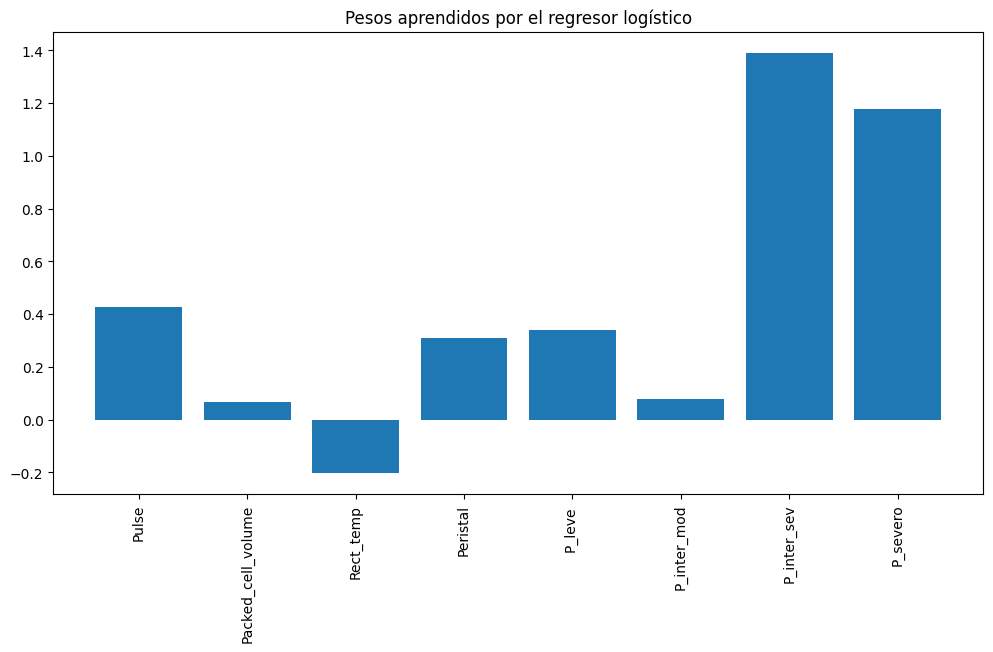

In [43]:
#Recuperamos los coeficientes del modelo logístico
theta_logistic = best_logistic_model.coef_
names_col =["Pulse","Packed_cell_volume","Rect_temp", "Peristal", "P_leve ", "P_inter_mod", "P_inter_sev", "P_severo"]

#Graficamos los coeficientes del modelo logístico
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, theta_logistic.size), np.squeeze(theta_logistic))
ax.set_xticks(np.arange(0, theta_logistic.size))
ax.set_xticklabels(labels=names_col, rotation=90)
ax.set_title("Pesos aprendidos por el regresor logístico")
plt.show()

Preparamos el data test para realizar las evaluaciones

In [ ]:
#Cargamos el data test
horse_datatest = pd.read_csv("horse-colic.test", sep='\s+', na_values="?")
horse_datatest.loc[horse_datatest["Outcome"] == 3, "Outcome"] = 2
horse_datatest.info()

#Imputaciones de las variables que utilizamos

mediana_pulse = horse_datatest["Pulse"].median()
horse_datatest["Pulse"] = horse_datatest["Pulse"].fillna(mediana_pulse)

mediana_pcv = horse_datatest["Packed_cell_volume"].median()
horse_datatest["Packed_cell_volume"] = horse_datatest["Packed_cell_volume"].fillna(mediana_pcv)

mediana_cft = horse_datatest["Rect_temp"].median()
horse_datatest["Rect_temp"] = horse_datatest["Rect_temp"].fillna(mediana_cft)

moda_out = horse_datatest["Outcome"].mode()
horse_datatest["Outcome"] = horse_datatest["Outcome"].fillna(moda_out[0])

moda_pain = horse_datatest["Pain"].mode()
horse_datatest["Pain"] = horse_datatest["Pain"].fillna(moda_pain[0])

moda_peristal = horse_datatest["Peristal"].mode()
horse_datatest["Peristal"] = horse_datatest["Peristal"].fillna(moda_peristal[0])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surg?               67 non-null     float64
 1   Age                 68 non-null     int64  
 2   Hosp_num            68 non-null     int64  
 3   Rect_temp           59 non-null     float64
 4   Pulse               66 non-null     float64
 5   Respir_rate         55 non-null     float64
 6   Temp_of_extrem      59 non-null     float64
 7   Periph_pulse        54 non-null     float64
 8   Mucous_membr        67 non-null     float64
 9   Capill_ref_time     62 non-null     float64
 10  Pain                60 non-null     float64
 11  Peristal            60 non-null     float64
 12  Abdom_dist          59 non-null     float64
 13  Nasogas_tube        41 non-null     float64
 14  Nasogas_reflux      41 non-null     float64
 15  Nasogas_ref_PH      16 non-null     float64
 16  Feces     

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19116\4099876026.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  horse_datatest = pd.read_csv("horse-colic.test", delim_whitespace=True, na_values="?")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19116\4099876026.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  horse_datatest["Pulse"].fillna(mediana_pulse, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19116\40998

In [45]:
#Estandarizacion del test
cols = ["Pulse", "Packed_cell_volume", "Rect_temp"]
scaler = StandardScaler()

horse_datatest[cols] = scaler.fit_transform(horse_datatest[cols])

In [46]:
#Asignamos la variable respuesta dependeinte y las variables independientes del modelo
x_test = horse_datatest[["Pulse", "Pain","Packed_cell_volume", "Rect_temp","Peristal"]]
y_test = horse_datatest["Outcome"]
x_test = pd.get_dummies(x_test, columns=["Pain"], drop_first=True)
x_test = x_test.rename(columns={"Pain_2.0": "P_leve", "Pain_3.0" : "P_inter_mod", "Pain_4.0" : "P_inter_sev", "Pain_5.0" : "P_severo"})


x_test = x_test.dropna()
y_test = y_test.dropna()

x_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pulse               68 non-null     float64
 1   Packed_cell_volume  68 non-null     float64
 2   Rect_temp           68 non-null     float64
 3   Peristal            68 non-null     float64
 4   P_leve              68 non-null     bool   
 5   P_inter_mod         68 non-null     bool   
 6   P_inter_sev         68 non-null     bool   
 7   P_severo            68 non-null     bool   
dtypes: bool(4), float64(4)
memory usage: 2.5 KB


Ahora evaluamos el rendimiento del modelo sobre los datos de test

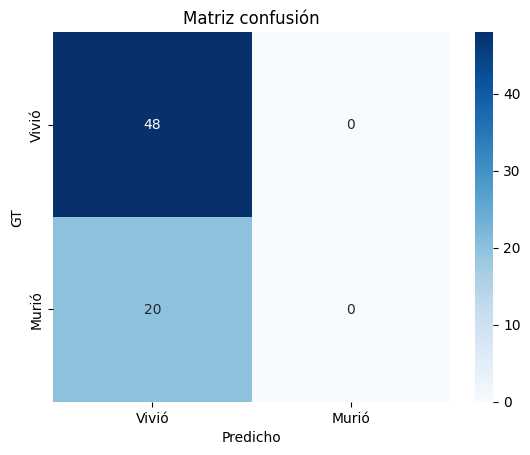

Exactitud del mejor modelo: 0.7058823529411765
Tasa de error del mejor modelo: 0.2941176470588235


In [47]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

#Predecimos con el mejor modelo en X_test
y_pred_best = best_logistic_model.predict(x_test)

#Calculamos la exactitud y la matriz de confusión del mejor modelo que obtuvimos
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(confusion_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=["Vivió","Murió"], yticklabels= ["Vivió","Murió"])
plt.xlabel("Predicho")
plt.ylabel("GT")
plt.title("Matriz confusión")
plt.show()

#Imprimimos los resultados
print("Exactitud del mejor modelo:", accuracy_best)
print("Tasa de error del mejor modelo:", 1 - accuracy_best)

Por lo tanto, se confirma la hipótesis. Las variables seleccionadas, cuando se usan en conjunto en un modelo multivariado, pueden predecir el resultado del caballo con una precisión significativa.

ACLARACIÓN DE LA HIPÓTESIS 6: Este test fue realizado en el colab correctamente (los datos mostrados en este informe), al transferirlo al jupyter en la ejecución si bien el modelo dió la misma precisión inicial, al ponerlo a prueba con el dataframe de test en el ambiente de jupyter dio como resultado otros valores en la matriz de confusión que no se relacionan con los verdaderos datos obtenidos por el modelo de regresión logística.